In [1]:
# Pacotes utilizados
using MLDatasets
using ImageCore
using PyPlot
using LinearAlgebra
using Random
using Statistics
using Printf
using Quaternions
using JLD2, FileIO
using ProgressMeter
using ImageTransformations
include("RealStorkey.jl")
include("Conversion.jl")
rng = MersenneTwister(1234);

In [7]:
# Número de memorias
Pv = 1:2:30
N = 200
# Number of simulations
Nsim = 300

# numero maximo de iterações
it_max = 1000

1000

In [8]:
NoiseValues = 0.3

0.3

In [9]:
Success_total_0 = zeros(Float64,(length(Pv),));
Success_total_1 = zeros(Float64,(length(Pv),));
Success_total_2 = zeros(Float64,(length(Pv),));
Success_total_3 = zeros(Float64,(length(Pv),));

In [10]:
@showprogress for i=1:length(Pv)
    
    P = Pv[i]
    
    println("Iteracion")
    println(i)
    println(" ")
    
    Success_0 = zeros(Int64,(Nsim,));
    Success_1 = zeros(Int64,(Nsim,));
    Success_2 = zeros(Int64,(Nsim,));
    Success_3 = zeros(Int64,(Nsim,)); 
    
    # Synthetic fundamental memory matrix
    Ub = 2*rand(rng,Bool,(N,P)).-1;
    
    for j =1:Nsim
        
    # Generic Binary Corrupted Vector
    xbr = 1.0*copy(Ub[:,1]) .* (1 .- 2*(rand(N,1) .< NoiseValues))      
        
########################################################################################
### Storing Rules ######################################################################
########################################################################################        
        W_b = RealStorkey.Correlation(Ub)
        W_1 = RealStorkey.storkey_learning(Ub,RealStorkey.first)
        W_p = RealStorkey.Projection(Ub)
        W_2 = RealStorkey.storkey_learning(Ub,RealStorkey.second)
      
########################################################################################
### Correlação ###################################################################
########################################################################################        
        y1 =  RealStorkey.Asy(W_b,xbr,it_max);

        Error = norm(Ub[:,1]-y1)

        if Error<1.e-4
            Success_0[j] = Success_0[j] + 1
        end
    
########################################################################################
### Storkey de Primeira ordem ##################################################################
########################################################################################   
        
        y2 = RealStorkey.Asy(W_1,xbr,it_max); 
        
        Error = norm(Ub[:,1]-y2)

        if Error<1.e-4
            Success_1[j] = Success_1[j] + 1
        end
        
        y3 = RealStorkey.Asy(W_p,xbr,it_max); 
        
        Error = norm(Ub[:,1]-y3)

        if Error<1.e-4
            Success_2[j] = Success_2[j] + 1
        end 
        
        y4 = RealStorkey.Asy(W_2,xbr,it_max); 
        
        Error = norm(Ub[:,1]-y4)

        if Error<1.e-4
            Success_3[j] = Success_3[j] + 1
        end       
        
    Success_total_0[i] = sum(Success_0)/Nsim
    Success_total_1[i] = sum(Success_1)/Nsim
    Success_total_2[i] = sum(Success_2)/Nsim
    Success_total_3[i] = sum(Success_3)/Nsim
        
end
    
end

@save "JLDs/FixedNoise_Comparison_P.jld2" Success_total_0 Success_total_1 Success_total_2 Success_total_3  NoiseValues Pv

Iteracion
1
 


Progress:   7%|██▊                                      |  ETA: 0:00:10

Iteracion
2
 


Progress:  13%|█████▌                                   |  ETA: 0:01:44

Iteracion
3
 


Progress:  20%|████████▎                                |  ETA: 0:03:03

Iteracion
4
 


Progress:  27%|██████████▉                              |  ETA: 0:04:08

Iteracion
5
 


Progress:  33%|█████████████▋                           |  ETA: 0:05:07

Iteracion
6
 


Progress:  40%|████████████████▍                        |  ETA: 0:06:09

Iteracion
7
 


Progress:  47%|███████████████████▏                     |  ETA: 0:07:12

Iteracion
8
 


Progress:  53%|█████████████████████▉                   |  ETA: 0:07:47

Iteracion
9
 


Progress:  60%|████████████████████████▋                |  ETA: 0:07:50

Iteracion
10
 


Progress:  67%|███████████████████████████▍             |  ETA: 0:07:25

Iteracion
11
 


Progress:  73%|██████████████████████████████▏          |  ETA: 0:06:53

Iteracion
12
 


Progress:  80%|████████████████████████████████▊        |  ETA: 0:05:42

Iteracion
13
 


Progress:  87%|███████████████████████████████████▌     |  ETA: 0:04:07

Iteracion
14
 


Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:02:14

Iteracion
15
 


Progress: 100%|█████████████████████████████████████████| Time: 0:35:37


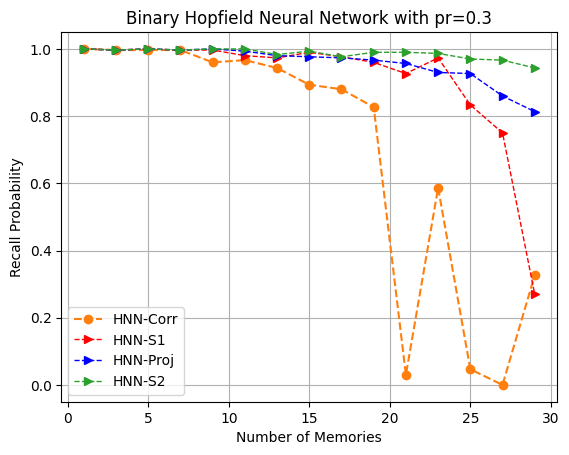

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
@load "JLDs/FixedNoise_Comparison_P.jld2"

### Correlation ###
plot(Pv,Success_total_0,linewidth=1.5,color="#ff7f0e",linestyle ="dashed", marker="o",label = "HNN-Corr")
plot(Pv,Success_total_1,linewidth=1,color="red",linestyle ="dashed", marker=">",label = "HNN-S1")
plot(Pv,Success_total_2,linewidth=1,color="blue",linestyle ="dashed", marker=">",label = "HNN-Proj")
plot(Pv,Success_total_3,linewidth=1,color="#2ca02c",linestyle ="dashed", marker=">",label = "HNN-S2")


xlabel("Number of Memories")
ylabel("Recall Probability")
#legend(bbox_to_anchor=[1,1],loc=2,borderaxespad=0)
legend()
title("Binary Hopfield Neural Network with pr=0.3")
grid()
savefig("Figures/RealRecall_P.eps")
savefig("Figures/RealRecall_P.pdf")